# Typical Sets
Jupyter notebook to show how typical sets work (work in progress)

In [1]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb

%matplotlib nbagg


<IPython.core.display.Javascript object>


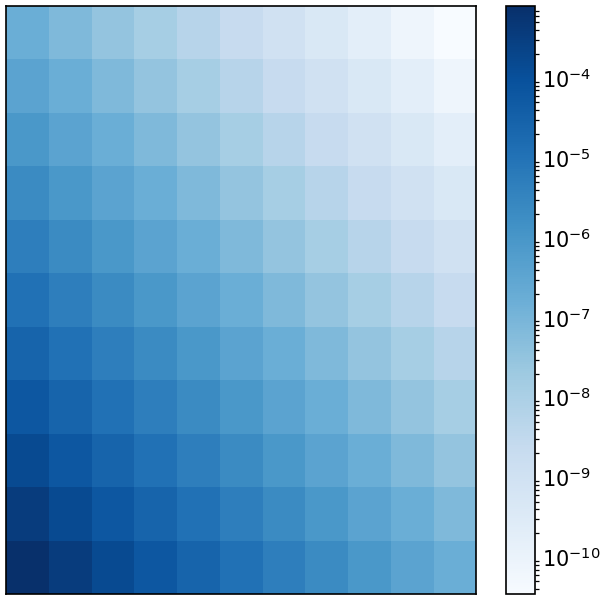

interactive(children=(FloatSlider(value=4.0, description='Range: ', max=10.0), FloatSlider(value=2.0, descript…

In [2]:
plt.style.use('_mpl-gallery-nogrid')

# make data with uneven sampling in x
num_points = 10
probability = 0.3
x = np.linspace(0,num_points, num_points+1)
X, Y = np.meshgrid(x, np.linspace(0,num_points, num_points+1))
Z = (probability**(X)*(1-probability)**(num_points-(X))) * (probability**(Y)*(1-probability)**(num_points-(Y)))
Z2 = np.ones((num_points+1,num_points+1))
delta = 1
for i in range(num_points+1):
    for j in range(num_points+1):
        if ((i + j)/2 <= num_points*probability + delta):
            if ((i + j)/2 >= num_points*probability - delta):
                continue
            else:
                Z2[i,j] = np.nan
        else:
            Z2[i,j] = np.nan
            

#Z[0] = Z[0] - probability
#Z[num_points - 1] = Z[num_points - 1] - probability

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4))

def update_plot(rangev, maxv):
    plt.clf()
    ax.clear
    plt.pcolormesh(X, Y, Z, norm = "log", cmap=plt.cm.Blues)
    plt.colorbar()
    plt.pcolormesh(X,Y,Z2, vmin=0, vmax=1, alpha=0.0)
    plt.show()
    # plot
    
maxv = widgets.FloatSlider(min=-2, max=10, value=2, description='Max: ')
rangev = widgets.FloatSlider(min=0, max=10, value=4, description='Range: ')

widgets.interactive(update_plot, rangev=rangev, maxv=maxv)





<IPython.core.display.Javascript object>


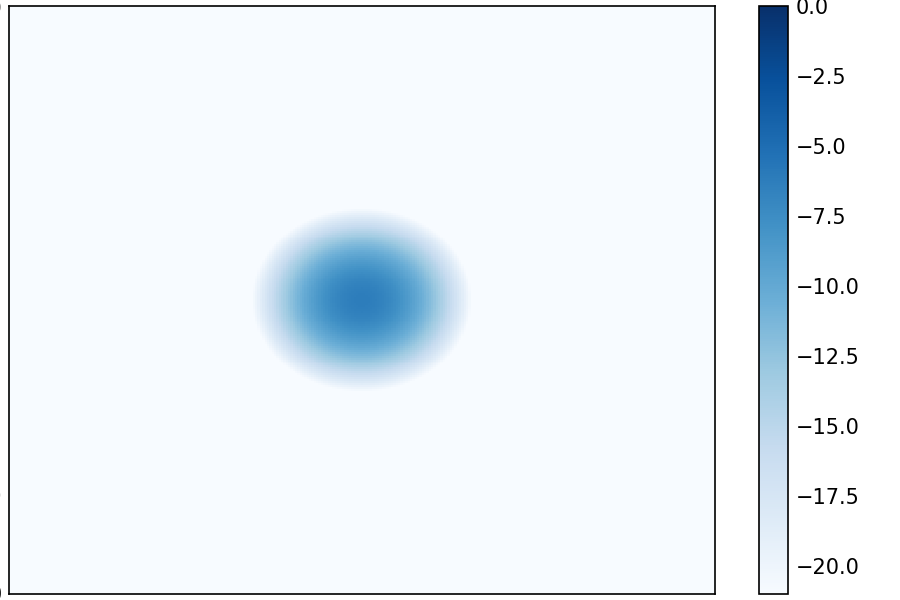

interactive(children=(IntSlider(value=5, description='Points: ', max=300, min=5), FloatSlider(value=0.5, descr…

In [6]:
plt.style.use('_mpl-gallery-nogrid')
import panel as pn
# make data with uneven sampling in x
num_points = 5
probability = 0.4
x = np.linspace(0,num_points, num_points+1)
X, Y = np.meshgrid(x, np.linspace(0,num_points, num_points+1))
Z = (probability**(X)*(1-probability)**((num_points)-(X))*comb(num_points,(X)))  *  (probability**(Y)*(1-probability)**((num_points)-(Y))*comb(num_points,(Y)))
Z2 = np.ones((num_points+1,num_points+1))
delta = 1
for i in range(num_points+1):
    for j in range(num_points+1):
        if ((i + j)/2 <= num_points*probability + delta):
            if ((i + j)/2 >= num_points*probability - delta):
                continue
            else:
                Z2[i,j] = np.nan
        else:
            Z2[i,j] = np.nan
            
#Z[0] = Z[0] - probability
#Z[num_points - 1] = Z[num_points - 1] - probability

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

def update_plot(points, probabilityarg, logrange, logmax):
    num_points = points
    probability = probabilityarg
    x = np.linspace(0,num_points, num_points+1)
    X, Y = np.meshgrid(x, np.linspace(0,num_points, num_points+1))
    Z = (probability**(X)*(1-probability)**((num_points)-(X))*comb(num_points,(X)))  *  (probability**(Y)*(1-probability)**((num_points)-(Y))*comb(num_points,(Y)))
    ZLog = np.log(Z)
    Z2 = np.ones((num_points+1,num_points+1))
    delta = 1
    sum = 0
    seqnum = 0
    for i in range(num_points+1):
        for j in range(num_points+1):
            if ZLog[i,j] > logmax-logrange:
                sum += Z[i,j]
                seqnum+= 1
                
    plt.clf()
    ax.clear
    plt.pcolormesh(X, Y, ZLog, vmin = logmax-logrange, vmax = logmax,  cmap=plt.cm.Blues)
    plt.colorbar()
    plt.show()
    print("Sum of Sequences within limits:" + str(sum))
    print("Percentage of Unique Sequences included: " + str(seqnum/(num_points**2)))
    # plot
    
probability = widgets.FloatSlider(min=0, max=1, value=.5, description='Probability: ')
points = widgets.IntSlider(min=5, max=300, value=5, description='Points: ')
logrange = widgets.IntSlider(min = 0, max = 100, value = 5, description='Lower Bound: ')
logmax = widgets.FloatSlider(min = -50, max = 0, value = 0, description='Color Max: ')
widgets.interactive(update_plot, points= points, probabilityarg = probability,logrange = logrange, logmax=logmax)


